In [1]:
print("Hello world")

Hello world


<h4 style="color: rgb(100, 100, 255)">Data Exploration and Importing</h4>

In [ ]:
import pandas as pd
import numpy as np

file_path = pd.read_csv('coaster_db.csv')

df = file_path
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [2]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [3]:
df.isnull().sum()

coaster_name                        0
Length                            134
Speed                             150
Location                            0
Status                            213
Opening date                      250
Type                                0
Manufacturer                       59
Height restriction                256
Model                             343
Height                            122
Inversions                        155
Lift/launch system                292
Cost                              705
Trains                            369
Park section                      600
Duration                          322
Capacity                          512
G-force                           725
Designer                          509
Max vertical angle                730
Drop                              593
Soft opening date                 991
Fast Lane available              1018
Replaced                          914
Track layout                      752
Fastrack ava

In [8]:
# Display basic information and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

(None,
                              coaster_name          Length             Speed  \
 0                      Switchback Railway  600 ft (180 m)  6 mph (9.7 km/h)   
 1                       Flip Flap Railway             NaN               NaN   
 2  Switchback Railway (Euclid Beach Park)             NaN               NaN   
 3            Loop the Loop (Coney Island)             NaN               NaN   
 4            Loop the Loop (Young's Pier)             NaN               NaN   
 
                          Location   Status   Opening date   Type  \
 0                    Coney Island  Removed  June 16, 1884   Wood   
 1                   Sea Lion Park  Removed           1895   Wood   
 2  Cleveland, Ohio, United States   Closed            NaN  Other   
 3                           Other  Removed           1901  Steel   
 4                           Other  Removed           1901  Steel   
 
              Manufacturer Height restriction        Model  ...  speed1  \
 0  LaMarcus Adna Th

In [11]:
import re
numeric_columns = ["Length", "Speed", "Height", "Drop", "G-force", "Max vertical angle", "Cost"]

# Improved function to clean numeric columns properly
def clean_numeric_column(df, column_name):
    """Converts a column with mixed data types into numeric by extracting valid numbers."""
    def clean_value(value):
        # Remove non-numeric characters except dots
        cleaned = re.sub(r"[^\d.]", "", str(value))
        # Keep only the first decimal point if multiple exist
        if cleaned.count('.') > 1:
            parts = cleaned.split('.')
            cleaned = parts[0] + '.' + ''.join(parts[1:])  # Keep first dot, remove others
        # Convert to float or NaN if empty
        return float(cleaned) if cleaned else None
    
    df[column_name] = df[column_name].apply(clean_value)
    return df

# Re-attempt numeric conversion
for col in numeric_columns:
    if col in df.columns:
        df = clean_numeric_column(df, col)

# Check updated data types and missing values
df[numeric_columns].info(), df[numeric_columns].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Length              953 non-null    float64
 1   Speed               937 non-null    float64
 2   Height              965 non-null    float64
 3   Drop                494 non-null    float64
 4   G-force             362 non-null    float64
 5   Max vertical angle  357 non-null    float64
 6   Cost                382 non-null    float64
dtypes: float64(7)
memory usage: 59.6 KB


(None,
      Length  Speed  Height    Drop  G-force  Max vertical angle  Cost
 0  600180.0   69.7  5015.0  4313.0      2.9                30.0   NaN
 1       NaN    NaN     NaN     NaN     12.0                 NaN   NaN
 2       NaN    NaN     NaN     NaN      NaN                 NaN   NaN
 3       NaN    NaN     NaN     NaN      NaN                 NaN   NaN
 4       NaN    NaN     NaN     NaN      NaN                 NaN   NaN)

In [13]:
df.isnull().sum()

coaster_name                        0
Length                            134
Speed                             150
Location                            0
Status                            213
Opening date                      250
Type                                0
Manufacturer                       59
Height restriction                256
Model                             343
Height                            122
Inversions                        155
Lift/launch system                292
Cost                              705
Trains                            369
Park section                      600
Duration                          322
Capacity                          512
G-force                           725
Designer                          509
Max vertical angle                730
Drop                              593
Soft opening date                 991
Fast Lane available              1018
Replaced                          914
Track layout                      752
Fastrack ava

<h4 style="color: rgb(100, 100, 255)">Handling Missing Values</h4>

In [ ]:
# Define threshold for dropping columns (60% missing values)
missing_threshold = 0.6
missing_percentage = df.isnull().mean()  # Calculate missing value percentage

# Drop columns with more than 60% missing values
cols_to_drop = missing_percentage[missing_percentage > missing_threshold].index.tolist()
df_cleaned = df.drop(columns=cols_to_drop)
df_cleaned.fillna(df_cleaned.select_dtypes(include=['number']).median(), inplace=True)

# Fill missing values in remaining numeric columns with median
# df_cleaned.fillna(df_cleaned.median(), inplace=True)

# Check the updated dataset
df_cleaned.info(), df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   coaster_name        1087 non-null   object 
 1   Length              1087 non-null   float64
 2   Speed               1087 non-null   float64
 3   Location            1087 non-null   object 
 4   Status              874 non-null    object 
 5   Opening date        837 non-null    object 
 6   Type                1087 non-null   object 
 7   Manufacturer        1028 non-null   object 
 8   Height restriction  831 non-null    object 
 9   Model               744 non-null    object 
 10  Height              1087 non-null   float64
 11  Inversions          1087 non-null   float64
 12  Lift/launch system  795 non-null    object 
 13  Trains              718 non-null    object 
 14  Park section        487 non-null    object 
 15  Duration            765 non-null    object 
 16  Capaci

(None,
                              coaster_name     Length   Speed  \
 0                      Switchback Railway   600180.0    69.7   
 1                       Flip Flap Railway  2415736.0  4776.0   
 2  Switchback Railway (Euclid Beach Park)  2415736.0  4776.0   
 3            Loop the Loop (Coney Island)  2415736.0  4776.0   
 4            Loop the Loop (Young's Pier)  2415736.0  4776.0   
 
                          Location   Status   Opening date   Type  \
 0                    Coney Island  Removed  June 16, 1884   Wood   
 1                   Sea Lion Park  Removed           1895   Wood   
 2  Cleveland, Ohio, United States   Closed            NaN  Other   
 3                           Other  Removed           1901  Steel   
 4                           Other  Removed           1901  Steel   
 
              Manufacturer Height restriction        Model  ...  Type_Main  \
 0  LaMarcus Adna Thompson                NaN  Lift Packed  ...       Wood   
 1            Lina Beecher   

In [17]:
df_cleaned.describe()

,Length,Speed,Height,Inversions,Drop,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,Inversions_clean
count,1.087000e+03,1087.000000,1.087000e+03,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000
mean,6.605276e+12,11743.101116,6.492489e+06,1.326587,9624.418295,1994.986201,38.858292,-50.464749,53.319043,48.766697,88.388261,1.326587
std,1.487043e+14,23529.465779,8.011549e+07,2.030854,19658.633502,23.475248,13.434741,64.300221,21.751123,15.487959,128.409073,2.030854
min,1.975602e+02,16.226100,4.515000e+00,0.000000,2.448000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,0.000000
25%,9.352850e+05,3048.000000,1.641500e+02,0.000000,8024.000000,1989.000000,37.395900,-82.418750,41.000000,40.000000,45.900000,0.000000
50%,2.415736e+06,4776.000000,7.021000e+03,0.000000,8024.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,0.000000
75%,4.941600e+06,5792.000000,1.078300e+04,2.000000,8024.000000,2010.000000,42.107900,-3.055700,60.000000,55.900000,109.300000,2.000000
max,3.468106e+15,240149.100000,1.001053e+09,14.000000,418127.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,14.000000


In [18]:
df_cleaned.isnull().sum()

coaster_name            0
Length                  0
Speed                   0
Location                0
Status                213
Opening date          250
Type                    0
Manufacturer           59
Height restriction    256
Model                 343
Height                  0
Inversions              0
Lift/launch system    292
Trains                369
Park section          600
Duration              322
Capacity              512
Designer              509
Drop                    0
year_introduced         0
latitude                0
longitude               0
Type_Main               0
opening_date_clean    250
speed1                150
speed2                152
speed1_value            0
speed1_unit           150
speed_mph               0
height_value            0
height_unit           122
Inversions_clean        0
dtype: int64

<h4 style="color: rgb(100, 100, 255)">Exploratory Data Analysis</h4>

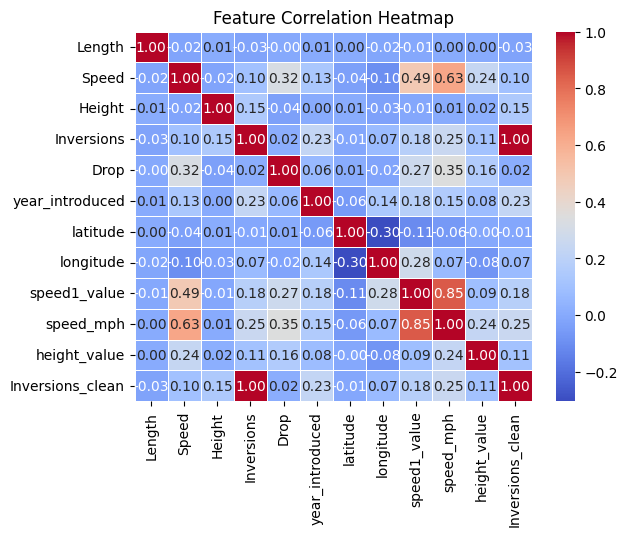

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df_cleaned.select_dtypes(include=['number'])  # Keep only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

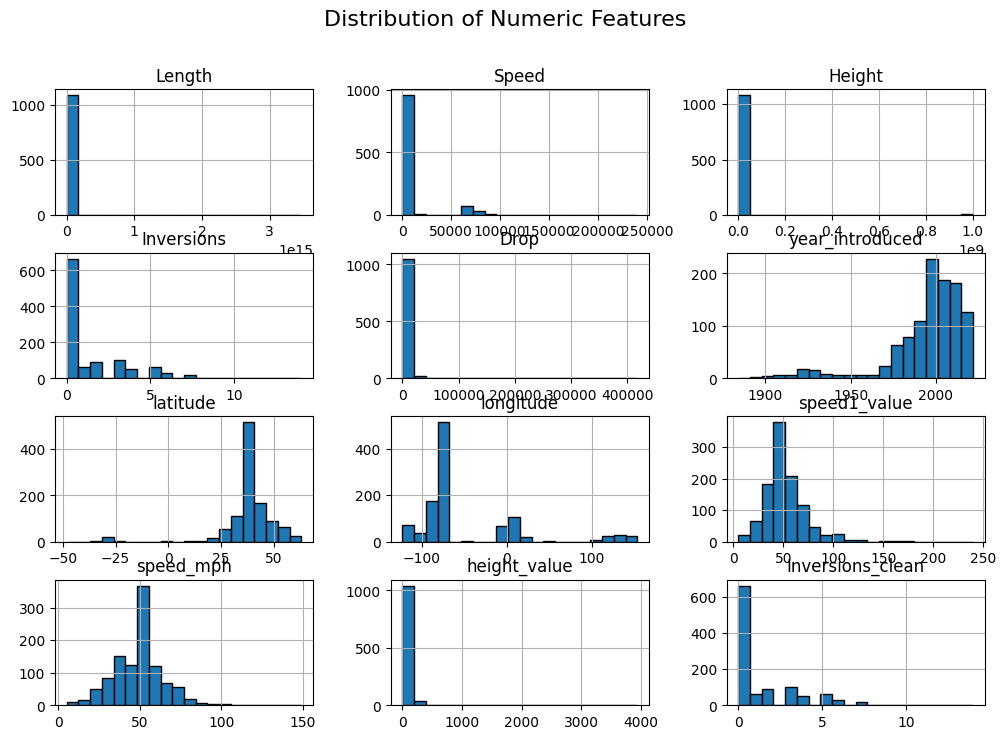

,Length,Speed,Height,Inversions,Drop,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,Inversions_clean
count,1.087000e+03,1087.000000,1.087000e+03,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000
mean,6.605276e+12,11743.101116,6.492489e+06,1.326587,9624.418295,1994.986201,38.858292,-50.464749,53.319043,48.766697,88.388261,1.326587
std,1.487043e+14,23529.465779,8.011549e+07,2.030854,19658.633502,23.475248,13.434741,64.300221,21.751123,15.487959,128.409073,2.030854
min,1.975602e+02,16.226100,4.515000e+00,0.000000,2.448000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,0.000000
25%,9.352850e+05,3048.000000,1.641500e+02,0.000000,8024.000000,1989.000000,37.395900,-82.418750,41.000000,40.000000,45.900000,0.000000
50%,2.415736e+06,4776.000000,7.021000e+03,0.000000,8024.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,0.000000
75%,4.941600e+06,5792.000000,1.078300e+04,2.000000,8024.000000,2010.000000,42.107900,-3.055700,60.000000,55.900000,109.300000,2.000000
max,3.468106e+15,240149.100000,1.001053e+09,14.000000,418127.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,14.000000


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics of numeric columns
summary_stats = df_cleaned.describe()

# Plot histograms for numeric features
df_cleaned.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()

summary_stats